In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pymbar

Warning on use of the timeseries module: If the inherent timescales of the system are long compared to those being analyzed, this statistical inefficiency may be an underestimate.  The estimate presumes the use of many statistically independent samples.  Tests should be performed to assess whether this condition is satisfied.   Be cautious in the interpretation of the data.


In [52]:

def readMBAROutput(molid, nStates, phase, linesToIgnore=0):
# Read data from all mbar files
# specify phase as vacuum or solvated (to match the input files)
# linesToIgnore: number of lines to skip at the beginning 
    N_k, u_kln = [], []
    for l in range(nStates):
        fname = f"{inputFolder}/mbar.{molid}.{l}.{phase}.out"
        data = np.loadtxt(fname, unpack=True, skiprows=linesToIgnore)
        N_k.append(np.shape(data)[1])
        data = np.transpose(data)
        u_kln.append(data)
    u_kln = np.array(u_kln) 
    u_kln = np.transpose(u_kln,(0,2,1)) #WHY ?

    return u_kln, N_k

# Get free energy differences
def MBAR(u_kln, N_k):
    mbar = pymbar.MBAR(u_kln, N_k)
    mbarres = mbar.compute_free_energy_differences()
    dg = mbarres['Delta_f']
    ddg = mbarres['dDelta_f']
    oldict = mbar.compute_overlap()
    return dg, ddg, oldict['matrix']

In [53]:

# To be modified 
##################
molid = 9979854
phase = "solvated"
inputFolder = "out/sai"
numberOfAlchemicalStates = 13 # either automate or read from file
#######################

dg, ddg, oldict = {}, {}, {}
for phase in ["solvated", "vacuum"]:
    u_kln, N_k = readMBAROutput(molid, numberOfAlchemicalStates, phase)
    dg[phase], ddg[phase], oldict[phase] = MBAR(u_kln, N_k)


print(f"Solv: {dg['solvated'][0][-1]} +/- {ddg['solvated'][0][-1]}")
print(f"Vacuum {dg['vacuum'][0][-1]} +/- {ddg['vacuum'][0][-1]}")

FileNotFoundError: out/sai/mbar.9979854.0.solvated.out not found.

In [40]:
print(f"Overlap with last state: ")
str = ""
for i in range(numberOfAlchemicalStates):
    str += f"{oldict['solvated'][-1][i] * 100:4.5}%  "
print(str)

Overlap with last state: 
0.060342%  0.050648%  0.049006%  0.071097%  0.22558%  0.25145%  0.13315%  0.13829%  0.15126%  0.57993%  3.3722%  3.6475%  91.27%  


12 12
[-2.651410496950504, -1.3978815905845785, -0.1396479216244071, -1.8106057447434294, 0.2833812059943144, -0.2503474415622353, -0.06927414106147456, -0.009783382089671555, -0.2866883030997389, 0.12074998580260932, -0.22721906333332864, 0.0]


KeyError: 0

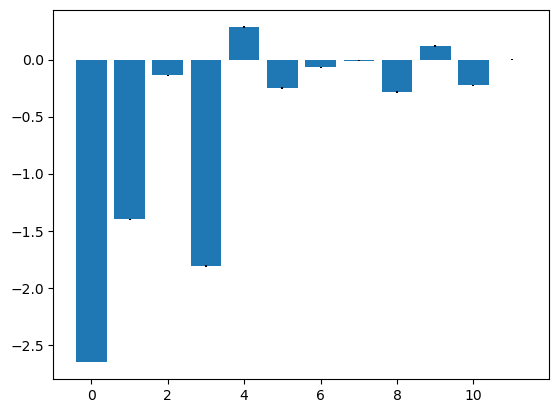

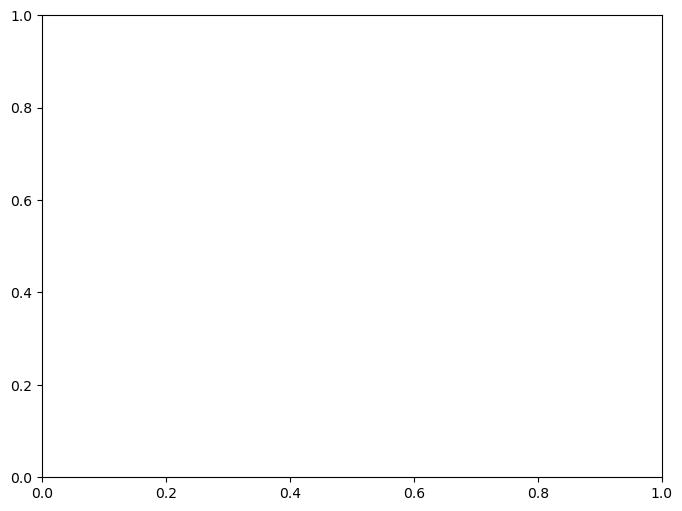

In [41]:

# Plot dg and uncertainties for each alch state in FEP mode (1->2, 2->3, etc)
dGdiff = [ dg[phase][0][i+1]-dg[phase][0][i] for i in range(numberOfAlchemicalStates-1) ]
x = [ i for i in range(numberOfAlchemicalStates-1) ]



fig, ax = plt.subplots()
print(len(dGdiff), len(x))
print(dGdiff)
ax.bar(x, dGdiff, yerr=ddg[phase][0][1:])
fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.bar(np.arange(numberOfAlchemicalStates), dg[0], yerr=ddg[0], color='blue', alpha=0.5, ecolor='black', capsize=10)    

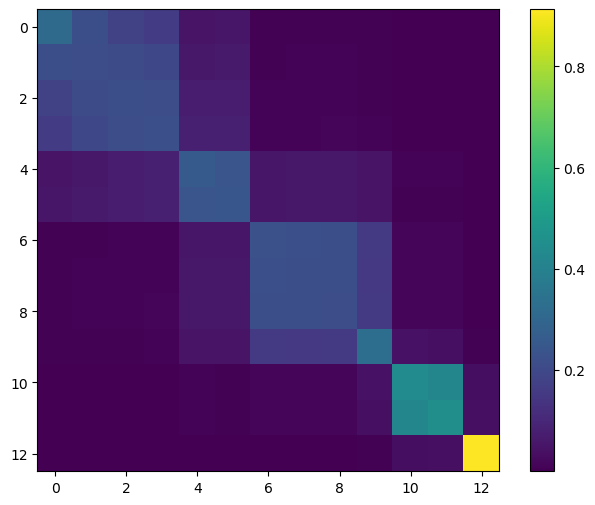

In [42]:
fig,ax = plt.subplots(1,1,figsize=(8,6))
im = ax.imshow(oldict['solvated'], cmap='viridis')
fig.colorbar(im, ax=ax)